Using Decision Tree to perdict the salary of an employee in a reputated company

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Data Science\datasets\salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


Seperating the dependent and independent variables

In [3]:
df_input = df.drop("salary_more_then_100k", axis="columns")
df_target = df.salary_more_then_100k

Encoding the dependent variable using Label Encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [6]:
df_input['company_n'] = le_company.fit_transform(df_input['company'])
df_input['job_n'] = le_company.fit_transform(df_input['job'])
df_input['degree_n'] = le_company.fit_transform(df_input['degree'])

Droping the extra columns

In [7]:
n_input = df_input.drop(["company", "job", "degree"], axis="columns")

In [8]:
n_input.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


Plotting the data points

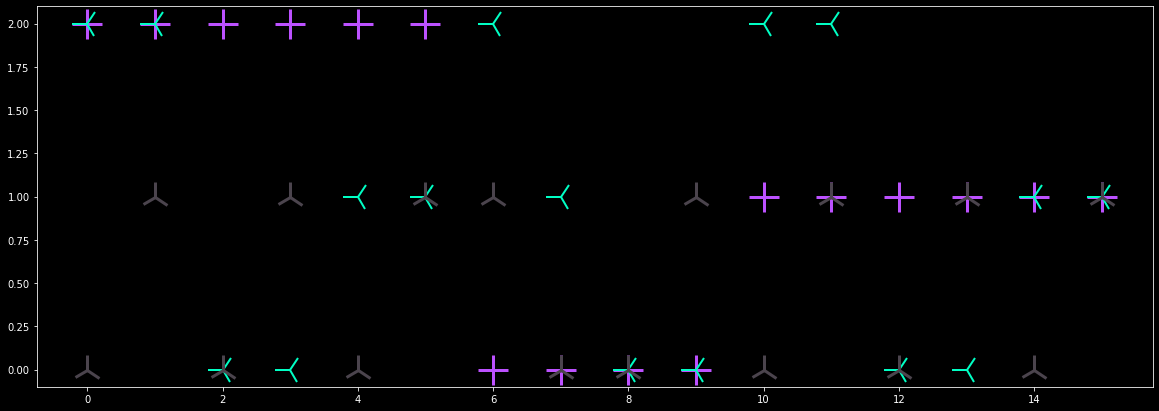

In [9]:
plt.style.use(['dark_background'])
plt.rcParams["figure.figsize"] = (20, 7)

plt.plot(n_input['company_n'], marker="+", linewidth=0, markersize=30, markeredgewidth=3, c="#bc51ff")
plt.plot(n_input['job_n'], marker="3", linewidth=0, markersize=30, markeredgewidth=2, c="#00ffc4")
plt.plot(n_input['degree_n'], marker="2", linewidth=0, markersize=30, markeredgewidth=3, c="#4B444D")

### 

Building, training and test the model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(n_input, df_target, train_size=0.9)

In [11]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model.predict(X_test)

array([0, 0], dtype=int64)

In [13]:
model.score(X_train, y_train)

1.0